In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

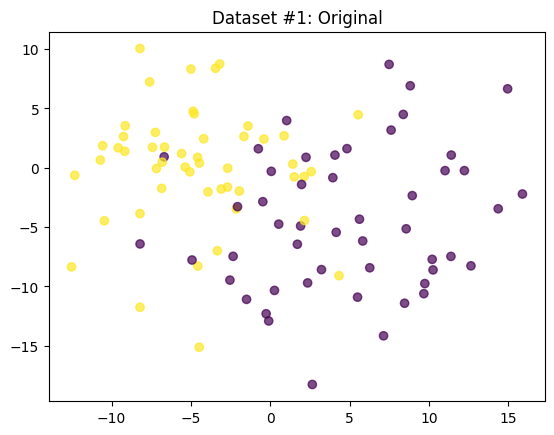

In [12]:
X1, label1 = make_blobs(n_samples=100, n_features=2, centers = 2, cluster_std=5, random_state =123)
plt.scatter(X1[:, 0], X1[:, 1], c = label1, alpha=0.7)
plt.title('Dataset #1: Original');


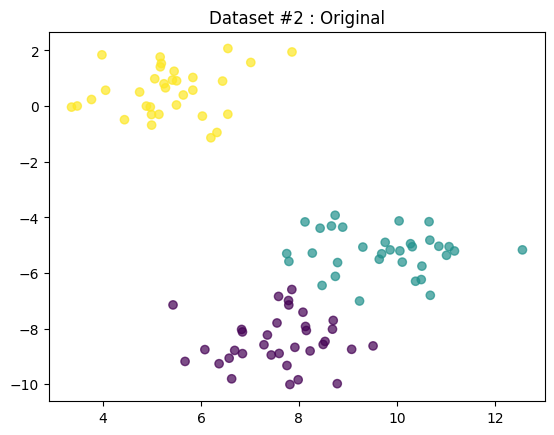

In [13]:
X2, label2 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, random_state=321)
plt.scatter(X2[:, 0], X2[:, 1], c = label2, alpha=0.7)
plt.title('Dataset #2 : Original');

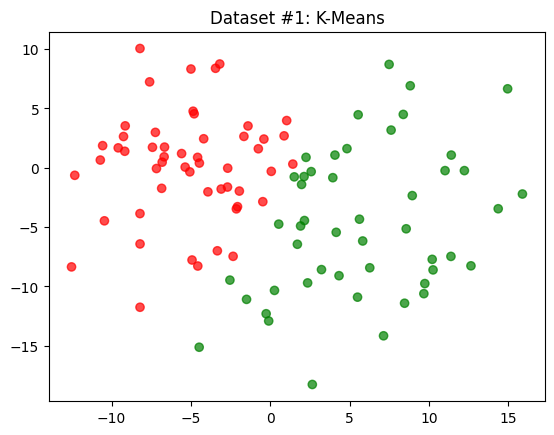

In [14]:
# Dataset #1 and two clusters
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)
myColors = {0:'red', 1:'green', 2:'blue'}
plt.scatter(X1[:, 0], X1[:, 1], c = pd.Series(kmeans.labels_).apply(lambda x:myColors[x]), alpha = 0.7)
plt.title('Dataset #1: K-Means');

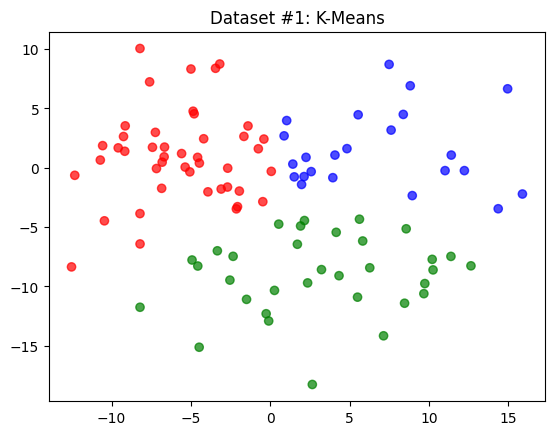

In [15]:
kmeans = KMeans(n_clusters=3, random_state=123, n_init='auto')
kmeans.fit(X1)
plt.scatter(X1[:,0], X1[:, 1], c = pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha = 0.7)
plt.title('Dataset #1: K-Means');

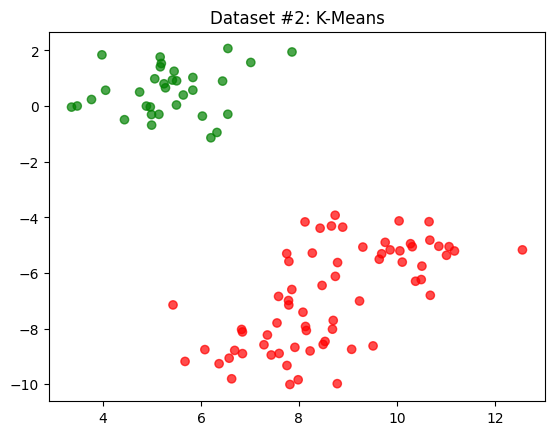

In [16]:
# Dataset #2 and two clusters
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c = pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha = 0.7)
plt.title('Dataset #2: K-Means');

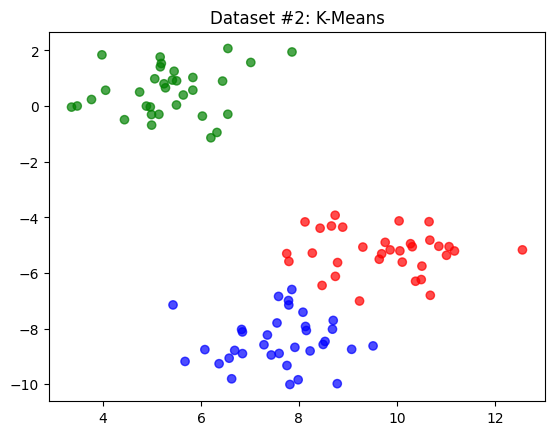

In [20]:
# Dataset #2 and three clusters
kmeans = KMeans(n_clusters = 3, random_state = 123, n_init='auto')
kmeans.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c = pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha = 0.7)
plt.title('Dataset #2: K-Means');

In [21]:
from warnings import WarningMessage
# K-Means clustering with real data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore') # Turn off the warnings
%matplotlib inline

In [22]:
# Load the 'Iris dataset from Seaborn
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])
Y = df['species']
header_X = X.columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=123, n_init='auto')
kmeans.fit(X)
res = pd.Series(kmeans.labels_)

In [24]:
# Frequency table of the observations labeled as '0'
# This cluster has the majority 'virginica'
case0 = Y[res==0]
print(case0.value_counts())

species
virginica     36
versicolor     2
Name: count, dtype: int64


In [25]:
# Frequency table of the observations labeled as '1'
# This cluster corresponds entirely to 'setosa'
case1 = Y[res == 1]
print(case1.value_counts())

species
setosa    50
Name: count, dtype: int64


In [26]:
# Frequency table of the observations labeled as '2'
# This cluster has the majority 'versicolor'
case2 = Y[res==2]
print(case2.value_counts())

species
versicolor    48
virginica     14
Name: count, dtype: int64


In [27]:
# A list that contains the learned labels
learnedLabels = ['Virginica', 'Setosa', 'Versicolor']

In [28]:
# Print out the cluster centers (centroids)
np.round(pd.DataFrame(kmeans.cluster_centers_, columns=header_X, index =['Cluster 0', 'Cluster 1', 'Cluster 2']), 2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


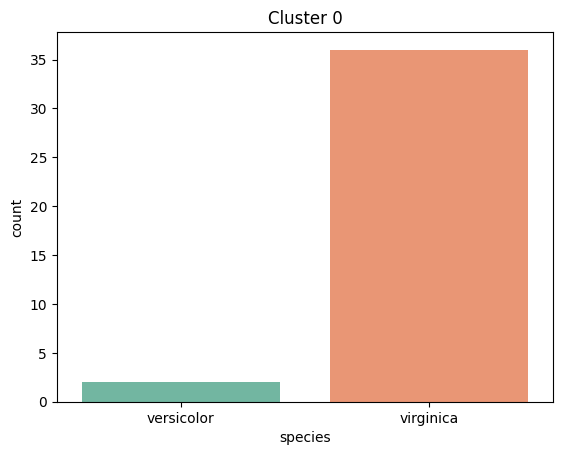

In [29]:
# Visualize
# Visualize the labeling content of the cluster 0
sns.countplot(x=case0, palette='Set2').set_title('Cluster 0');

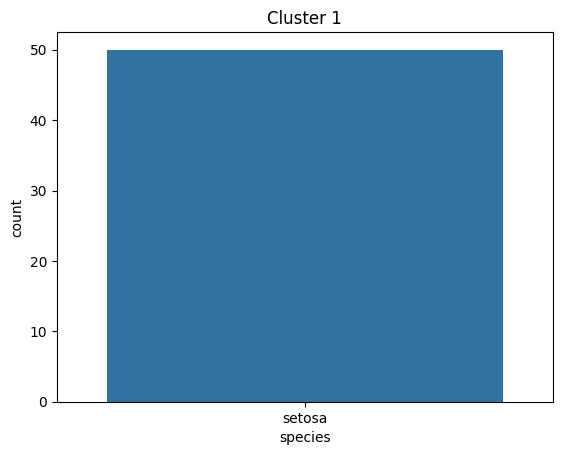

In [30]:
# Visualize the labeling content of the cluster 1
sns.countplot(x =case1).set_title('Cluster 1');

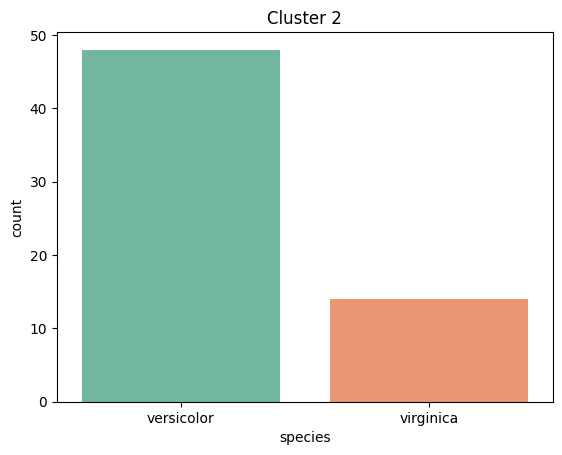

In [31]:
# Visualize the labeling content of the cluster 2
sns.countplot(x=case2, palette='Set2').set_title('Cluster 2');

In [32]:
# Prediction based on what we have learned
# For a given observation of X, predict the species from what we have learned
# Case 31
X_test = {'sepal_length':[7.0], 'sepal_width':[3.0], 'petal_length':[5.0], 'petal_width':[1.5]}
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}".format(predCluster, learnedLabels[predCluster]))

Predicted cluster 0 with the most probable label 'Virginica


In [33]:
# Case #2
X_test = {'sepal_length':[4.5], 'sepal_width':[3.0], 'petal_length':[1.0], 'petal_width':[4.0]}
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}".format(predCluster, learnedLabels[predCluster]))

Predicted cluster 1 with the most probable label 'Setosa


In [34]:
# Case #3
X_test = {'sepal_length':[6.0], 'sepal_width':[3.0], 'petal_length':[4.0], 'petal_width':[1.0]}
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}".format(predCluster, learnedLabels[predCluster]))

Predicted cluster 2 with the most probable label 'Versicolor


1. Compare clustering algorithms

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

1.1 Generate simulated data and visualize

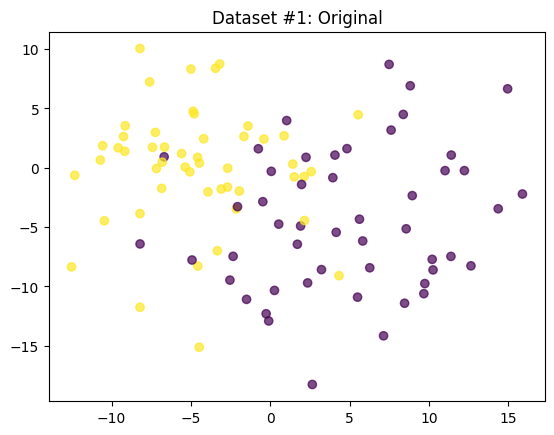

In [36]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=100, n_features=2, centers = 2, cluster_std=5, random_state =123)
plt.scatter(X1[:, 0], X1[:, 1], c = label1, alpha=0.7)
plt.title('Dataset #1: Original');

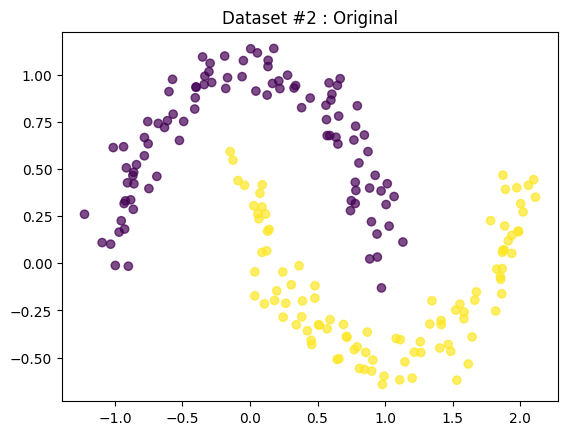

In [37]:
# Dataset #2
X2, label2 = make_moons(n_samples=200,noise = 0.08, random_state=321)
plt.scatter(X2[:, 0], X2[:, 1], c = label2, alpha=0.7)
plt.title('Dataset #2 : Original');

1.2 Apply k-means clustering and visualize

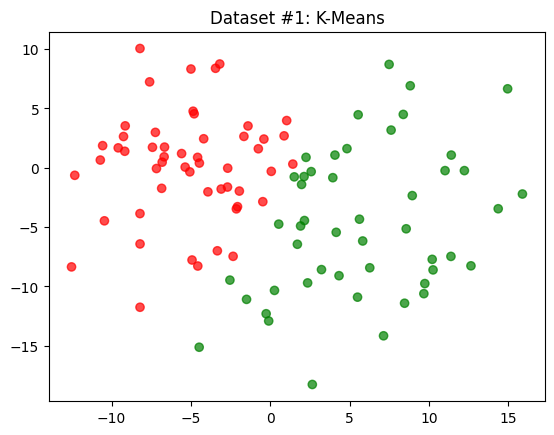

In [38]:
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)
myColors={0:'red', 1:'green', 2:'blue'}
plt.scatter(X1[:, 0], X1[:, 1], c = pd.Series(kmeans.labels_).apply(lambda x:myColors[x]), alpha = 0.7)
plt.title('Dataset #1: K-Means');

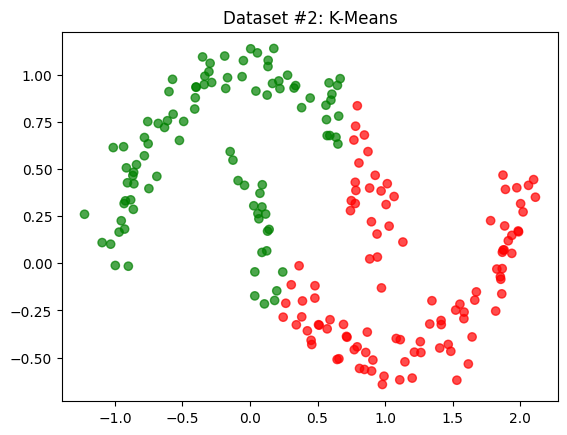

In [39]:
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X2)
myColors={0:'red', 1:'green', 2:'blue'}
plt.scatter(X2[:, 0], X2[:, 1], c = pd.Series(kmeans.labels_).apply(lambda x:myColors[x]), alpha = 0.7)
plt.title('Dataset #2: K-Means');

1.3 Apply agglomerative clustering and visualize

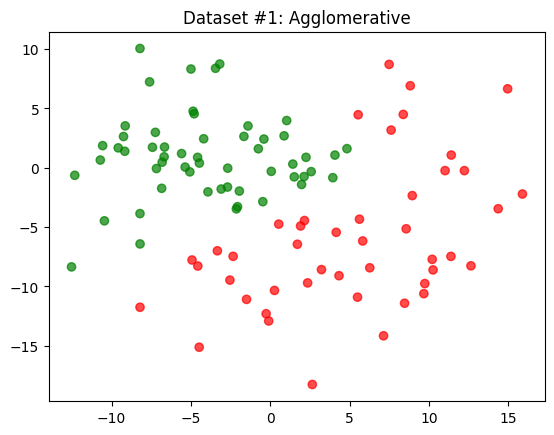

In [40]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red', 1:'green', 2:'blue'}
plt.scatter(X1[:, 0], X1[:, 1], c = pd.Series(agglo.labels_).apply(lambda x:myColors[x]), alpha = 0.7)
plt.title('Dataset #1: Agglomerative');

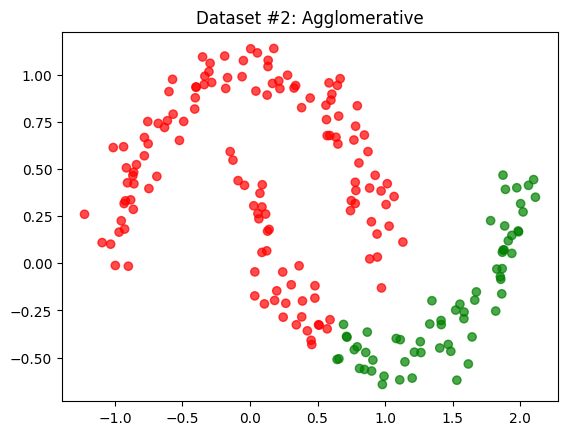

In [41]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red', 1:'green'}
plt.scatter(X2[:, 0], X2[:, 1], c = pd.Series(agglo.labels_).apply(lambda x:myColors[x]), alpha = 0.7)
plt.title('Dataset #2: Agglomerative');

1.4 Apply hierarchical clustering and visualize


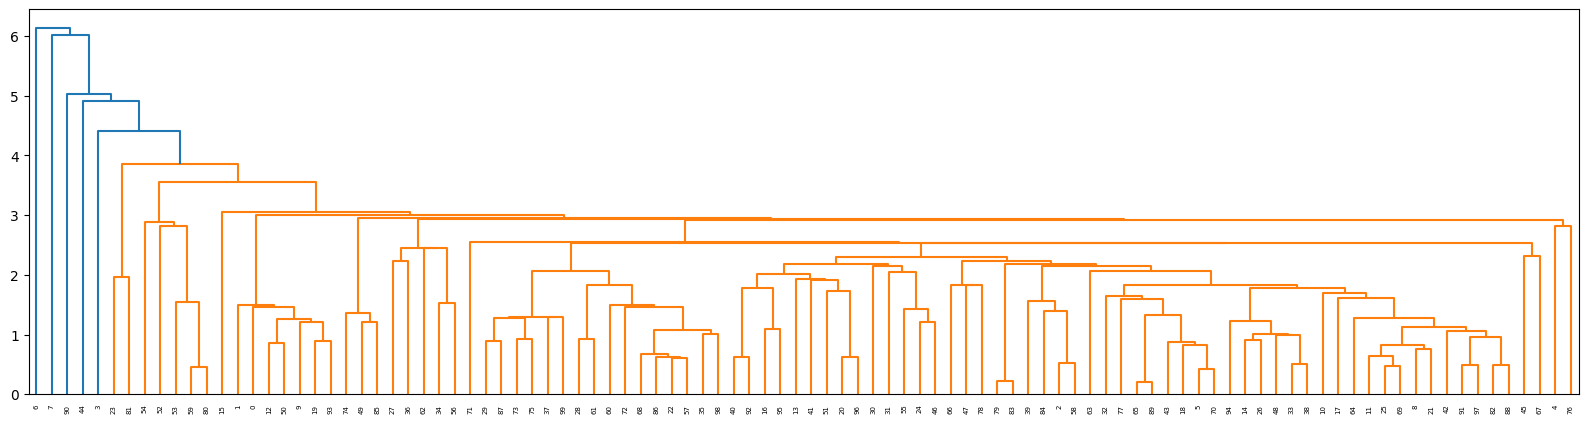

In [42]:
myLinkage = linkage(X1, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage);


In [43]:
labels = fcluster(myLinkage, 5, criterion='distance')
pd.Series(labels).value_counts()

,count
1,97
4,1
3,1
2,1


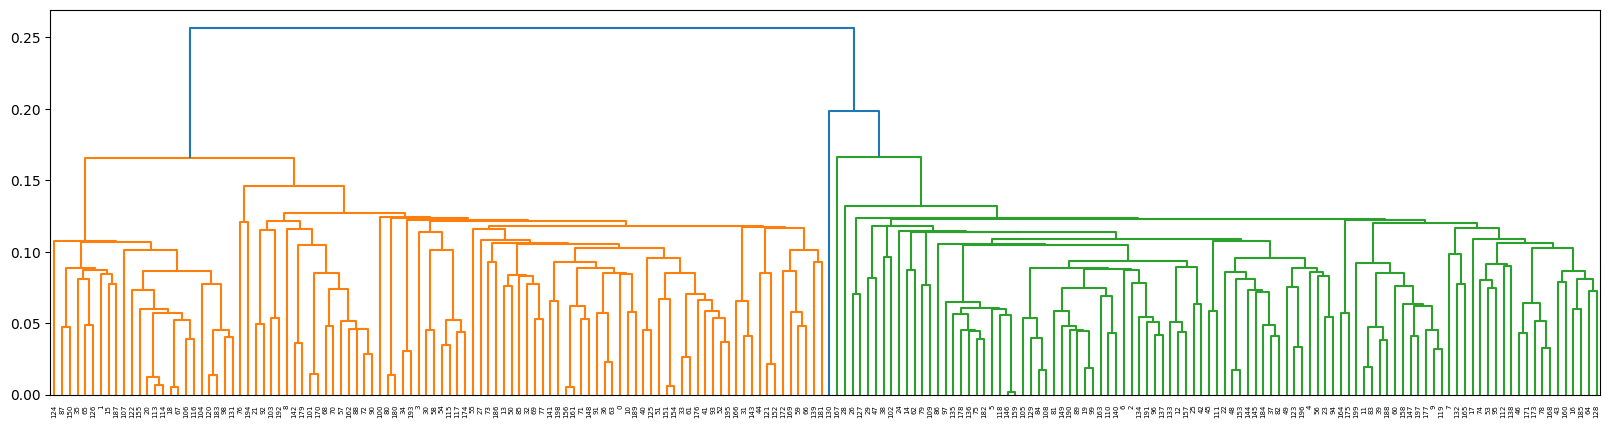

In [44]:
myLinkage = linkage(X2, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage);

In [45]:
labels = fcluster(myLinkage, 0.23, criterion='distance')
pd.Series(labels).value_counts()

,count
1,100
2,100


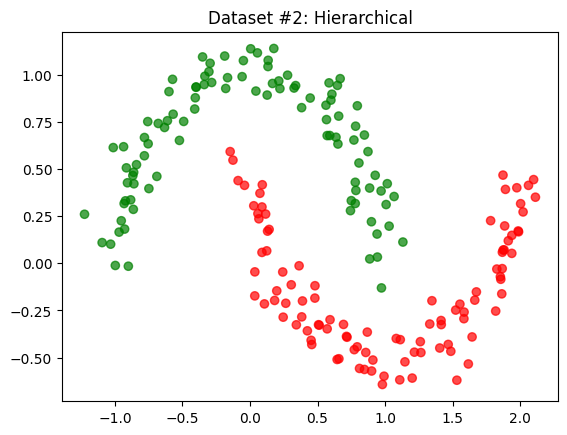

In [46]:
myColor = {1:'red', 2:'green'}
plt.scatter(X2[:, 0], X2[:, 1], c = pd.Series(labels).apply(lambda x:myColor[x]), alpha = 0.7)
plt.title('Dataset #2: Hierarchical');

1.5 Apply DBSCAN and visualize

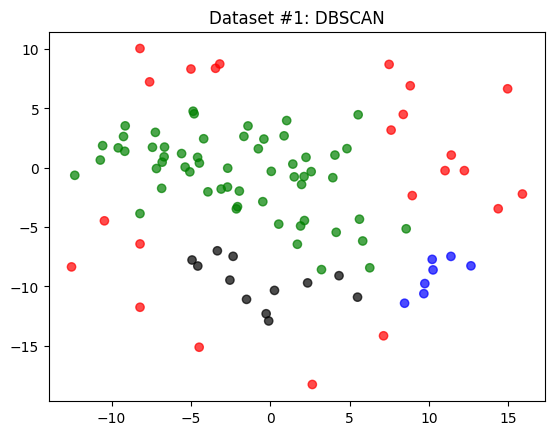

In [47]:
dbscan = DBSCAN(eps = 3, min_samples = 5)
dbscan.fit(X1)
myColors={-1:'red', 0:'green', 1:'blue'}
plt.scatter(X1[:, 0], X1[:, 1], c = pd.Series(dbscan.labels_).apply(lambda x:myColors.get(x,'black')), alpha = 0.7)
plt.title('Dataset #1: DBSCAN');

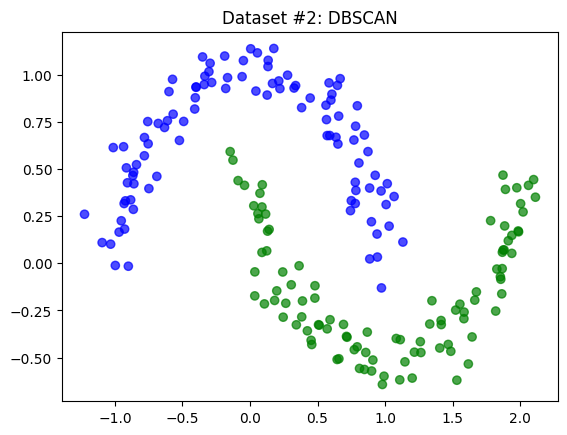

In [48]:
dbscan = DBSCAN(eps = 0.2, min_samples = 5)
dbscan.fit(X2)
myColors={-1:'red', 0:'green', 1:'blue'}
plt.scatter(X2[:, 0], X2[:, 1], c = pd.Series(dbscan.labels_).apply(lambda x:myColors[x]), alpha = 0.7)
plt.title('Dataset #2: DBSCAN');

1. Dimensional reduction with PCA

In [49]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA, NMF
from sklearn.datasets import make_blobs
%matplotlib inline

1.1 Read in data and explore

In [55]:
df = pd.read_csv('/abc.csv', header='infer')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df.shape

(150, 5)

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.2 Visualize the data

In [54]:
def ShowMe(X):
  Y = 1.0 - X
  plt.imshow(Y, cmap='gray')
  plt.axis('off')
  plt.show()

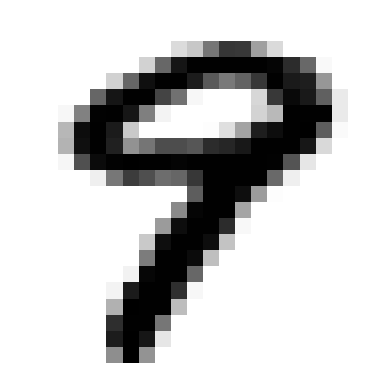

In [59]:
import numpy as np
X = np.array(df)
ShowMe(X)

1.3 Visualize the reduced dimensional input by PCA

In [56]:
def reducedInputPCA(X, nPC):
  pca = PCA(n_components=nPC)
  X_pca = pca.fit_transform(X)
  return pca.inverse_transform(X_pca)

N# of PCs =23


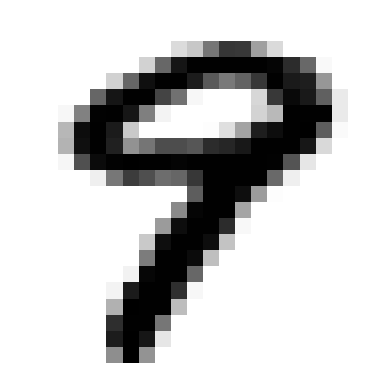

N# of PCs =10


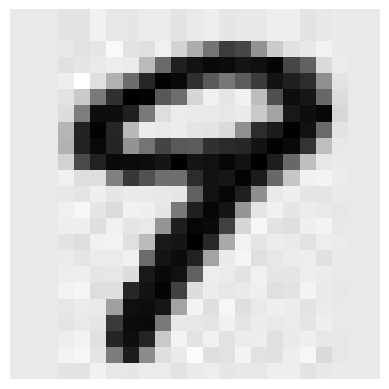

N# of PCs =5


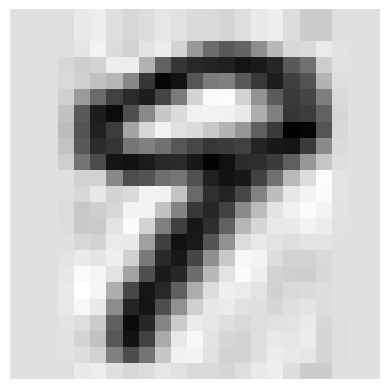

N# of PCs =3


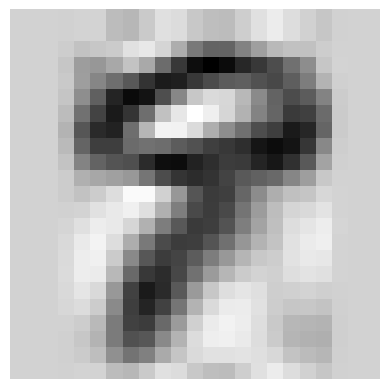

N# of PCs =1


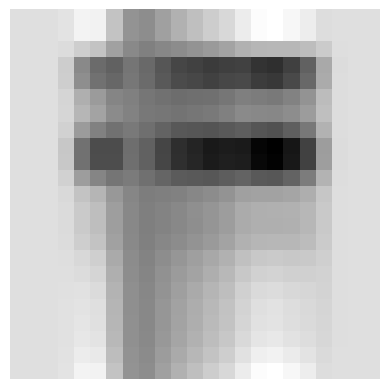

In [60]:
for nPC in [23, 10, 5, 3, 1]:
  Z = reducedInputPCA(X, nPC)
  print("N# of PCs =" + str(nPC))
  ShowMe(Z)

1.3 Analysis of the cumulative variance ration(CVR)

In [62]:
pca = PCA(n_components=23)
pca.fit(X)


PCA(n_components=23)

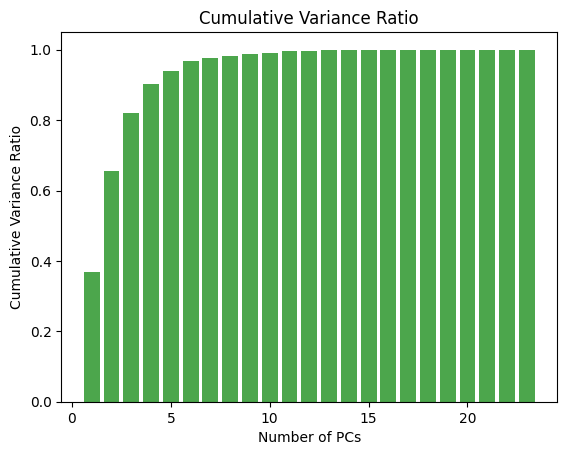

In [63]:
CVRs = np.cumsum(pca.explained_variance_ratio_)
nPCs = np.arange(23) + 1
plt.bar(nPCs, CVRs, color ='green', alpha = 0.7)
plt.title('Cumulative Variance Ratio')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio');

2. Dimensional reduction with NMF

2.1 Visualize the reduced dimensional input by NMF

In [7]:
# Define a fuction that returns reduced dimensional input
def reducedInputNMF(X, n):
  nmf = NMF(n_components=n, init='random', random_state=0)
  X_nmf = nmf.fit_transform(X)
  return nmf.inverse_transform(X_nmf)

N# of components =23


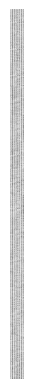

N# of components =10


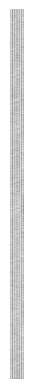

N# of components =5


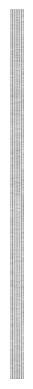

N# of components =3


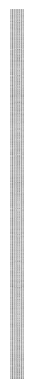

N# of components =1


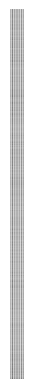

In [64]:
# Visualize the reduced dimensional input for different cases
# As we shrink the dimension, the image gets less clear
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
digits = load_digits()
X = digits.data
for n in [23, 10, 5, 3, 1]:
  Z = reducedInputNMF(X, n)
  print("N# of components =" + str(n))
  ShowMe(Z)

3. Optimized high dimensional visualization with PCA

In [65]:
# 3 clusters in 8 dimensional space
# Hard to visualize!
X, label = make_blobs(n_samples = 150, n_features = 8, centers = 3, cluster_std = 5, random_state=123)
X.shape

(150, 8)

In [67]:
# Define a custom color palette
myColors = {0:'red', 1:'green', 2:'blue'}
labelColors = pd.Series(label).apply(lambda x:myColors[x])

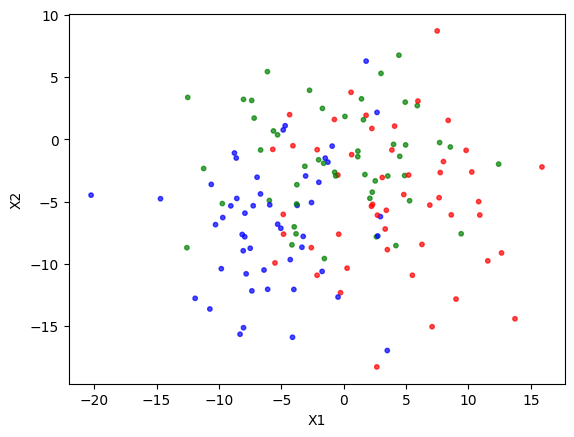

In [68]:
# Visualize on the X1 vs X2 plane. X1 ==> column 0, X2 ==> column 1.
# We can hardly tell the clusters apart
# The clusters largely overlap
plt.scatter(X[:,0], X[:, 1], c = labelColors, alpha = 0.7, s = 10, marker="o")
plt.xlabel('X1')
plt.ylabel('X2');

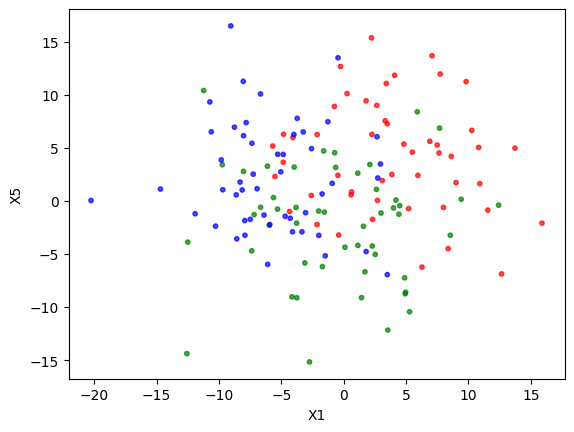

In [69]:
plt.scatter(X[:,0], X[:, 4], c = labelColors, alpha = 0.7, s = 10, marker="o")
plt.xlabel('X1')
plt.ylabel('X5');

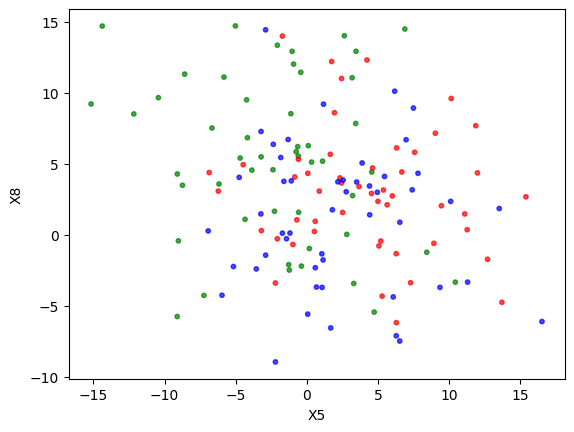

In [70]:
plt.scatter(X[:,4], X[:, 7], c = labelColors, alpha = 0.7, s = 10, marker="o")
plt.xlabel('X5')
plt.ylabel('X8');

In [71]:
# Only 2 first PCs are needed
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

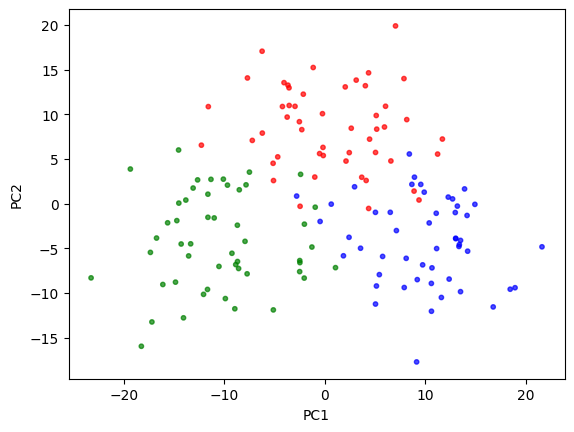

In [72]:
plt.scatter(X_pca[:,0], X_pca[:, 1], c = labelColors, alpha = 0.7, s = 10, marker="o")
plt.xlabel('PC1')
plt.ylabel('PC2');